In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:0'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(mes_val_for_diff=18,mes_val_for_same=0.8,conf_val_for_diff=0.3,conf_val_for_same=0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 504.05it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8242.03it/s]


absolute alignment indicates number: 167 label diff indicates number: 13 confidence diff indicates number: 15 high distance number: 75


In [10]:
from AlignVis.aproximate_ref_generator import ApproximateRefGenerator
aeg = ApproximateRefGenerator(ref_provider=ref_provider, tar_provider=tar_provider, REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH, tar_model=tar_model, ref_model=ref_model,DEVICE=DEVICE)

100%|██████████| 250/250 [00:00<00:00, 8263.27it/s]


In [ ]:
newRep = aeg.generate_representation_by_cka(predict_label_diff_indicates)

In [4]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,tar_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.9999998870553547


In [5]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,ref_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.8016675703145227


In [6]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [5 4 3 4 3 3 5 3 7 5 3 5 1]


100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]


adjusetd ref  predict res:  [5 4 3 2 3 0 3 3 7 3 4 5 1]


100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]

adjusetd ref  predict res:  [7 4 5 2 5 0 3 5 5 3 4 7 0]
target        predict res:  [7 5 5 2 5 0 3 5 5 3 4 7 0]


In [7]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [5 4 3 4 3 3 5 3 7 5 3 5 1]


100%|██████████| 1/1 [00:00<00:00, 2359.00it/s]


adjusetd ref  predict res:  [5 4 3 2 3 0 3 3 7 3 4 5 1]


100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]

adjusetd ref  predict res:  [7 4 5 2 5 0 3 5 5 3 4 7 0]
target        predict res:  [7 5 5 2 5 0 3 5 5 3 4 7 0]


In [8]:
X = ref_train_data
Y = tar_train_data

In [12]:
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n = alignment_n.align_embeddings_batch(Y,X,train_steps=18000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65500368.0 loss2 {tensor(0.7573, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8530, requires_grad=True)}
batch_idx 199,iteration 199, loss1 594.4033813476562 loss2 {tensor(0.5355, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5070, requires_grad=True)}
batch_idx 398,iteration 398, loss1 236.36988830566406 loss2 {tensor(0.3552, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4940, requires_grad=True)}
batch_idx 97,iteration 597, loss1 221.8357391357422 loss2 {tensor(0.3260, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4380, requires_grad=True)}
batch_idx 296,iteration 796, loss1 225.8459014892578 loss2 {tensor(0.3340, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4290, requires_grad=True)}
batch_idx 495,iteration 995, loss1 201.1376495361328 loss2 {tensor(0.2860, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3860, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 193.8719940185547 loss2 {tensor(0.2890, grad_fn=<AddBackward0>)} neibour_lo

In [ ]:
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
tar_projector= TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")


In [5]:
X = ref_train_data
Y = tar_train_data

S_n = alignment_n.align_embeddings_batch(X=np.dot(tar_train_data, R_n.detach().numpy()),Y=Y,train_steps=500,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 93999576.0 loss2 {tensor(0.9029, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8810, requires_grad=True)}
batch_idx 99,iteration 99, loss1 1322.1348876953125 loss2 {tensor(0.5665, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5620, requires_grad=True)}
batch_idx 198,iteration 198, loss1 219.8341064453125 loss2 {tensor(0.4174, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4110, requires_grad=True)}
batch_idx 297,iteration 297, loss1 167.7288055419922 loss2 {tensor(0.3267, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3400, requires_grad=True)}
batch_idx 396,iteration 396, loss1 120.37248992919922 loss2 {tensor(0.2442, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3160, requires_grad=True)}
batch_idx 495,iteration 495, loss1 144.3109588623047 loss2 {tensor(0.2652, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3240, requires_grad=True)}


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8775.43it/s]


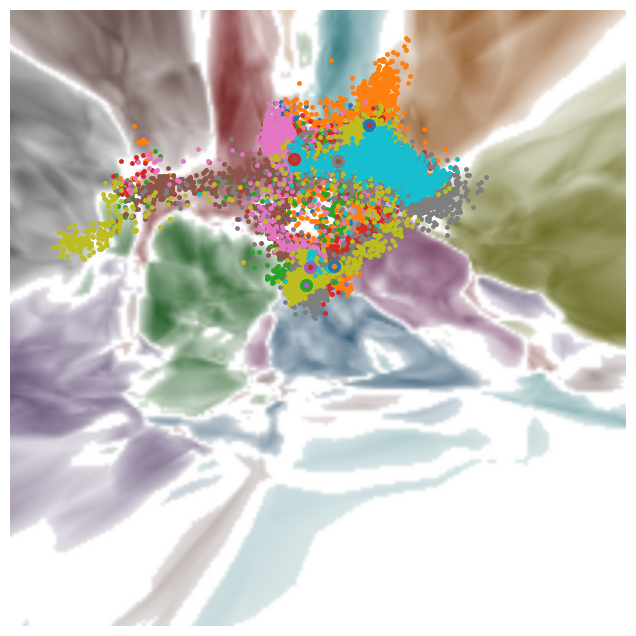

In [19]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider,I,I, np.dot(tar_train_data,I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 1/1 [00:00<00:00, 6647.07it/s]


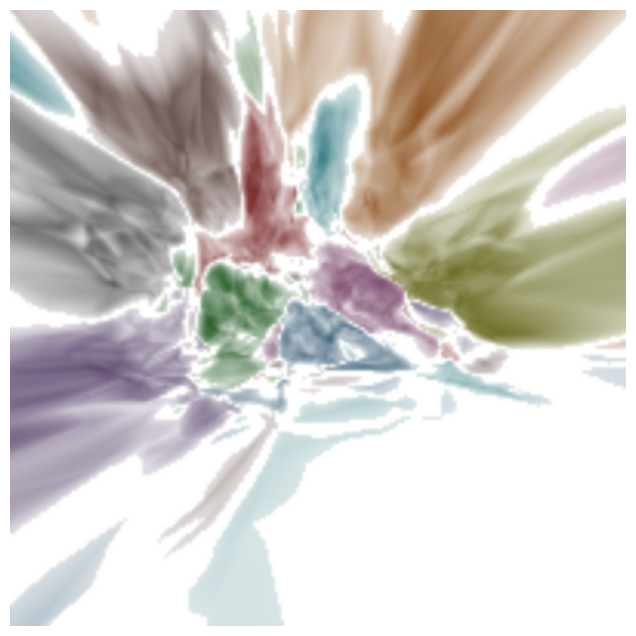

In [17]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, ref_train_data, projector, 200,[[]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 6037.51it/s]


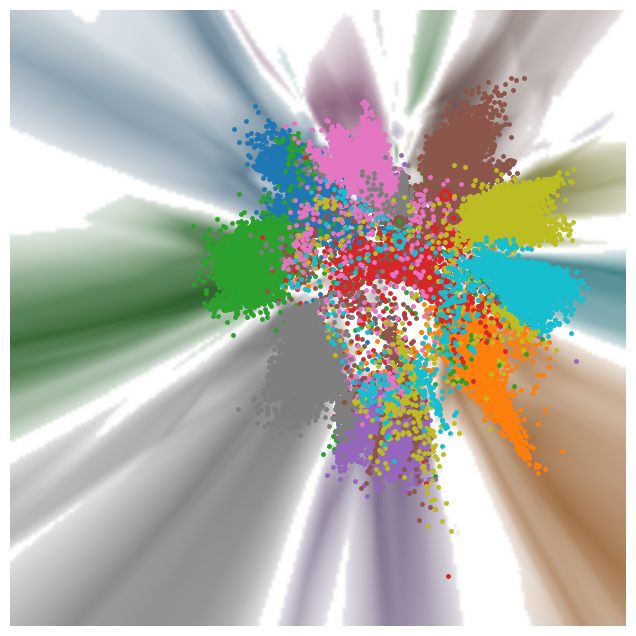

In [80]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, R_n.detach().numpy(),I, np.dot(ref_train_data,S_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))